# Engish-Hindi Translator - Exp 5  

-Exp with small sized dataset less than 10

# Preparing Data

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time 
import numpy as np
import pandas as pd
import random
random.seed=22

In [ ]:
# Import data
hin=open('/content/drive/MyDrive/Projects/English-HIndi Translator /IITB.en-hi.hi','r')
hin_inp=hin.read()
hin_inp=hin_inp.split('\n')
hin.close()
eng=open('/content/drive/MyDrive/Projects/English-HIndi Translator /IITB.en-hi.en','r')
eng_inp=eng.read()
eng_inp=eng_inp.split('\n')
eng.close()


# Create the appropriate data
k=list(zip(eng_inp,hin_inp))
random.shuffle(k)
k=[i for i in k if len(i[0].split())<12 and len(i[1].split())<12 and len(i[0].split())>3 and len(i[1].split())>3]
eng=[j for (j,i) in k]
hin=[i for (j,i) in k]



In [ ]:
# Tokenizing english text
tokenizer_eng=tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer_eng.fit_on_texts(eng)
#trn_eng1=tokenizer_eng.texts_to_sequences(eng)

# Tokenizing hindi text
tokenizer_hin=tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer_hin.fit_on_texts(hin)
#trn_hin=tokenizer_hin.texts_to_sequences(hin)


Distribution OOV for set 4-11
for hindi text :


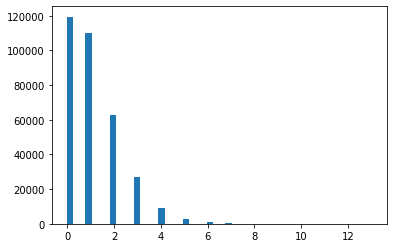

for English text :


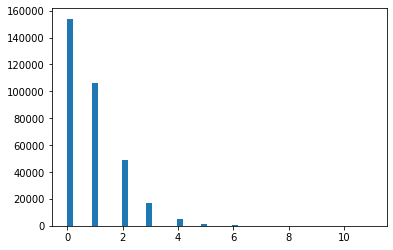

In [ ]:
# Lets see the OOV distribution
hin_set=tokenizer_hin.texts_to_sequences(hin)
eng_set=tokenizer_eng.texts_to_sequences(eng)


print('Distribution OOV for set 4-11')
h=[i.count(1) for i in hin_set]
e=[i.count(1) for i in eng_set]
print('for hindi text :')
plt.hist(h ,bins=50)
plt.show()
print('for English text :')
plt.hist(e ,bins=50)
plt.show()



after reduction: 89917
['नामक', 'फ़ाइल', 'मौजूद', 'नहीं', 'है'] 
 ['the', 'file', '“', 's”', 'does', 'not', 'exist', '“', 's”']
["'", "s'", 'के', 'लिये', 'गोपन', 'प्रमाणपत्र', 'मौजूद', 'नहीं', 'है'] 
 ['encryption', 'certificate', 'for', "'", "s'", 'does', 'not', 'exist']
['हम', 'चलते', 'रहते', 'हैं'] 
 ['let', "'s", 'keep', 'going']
['विंडो', 'को', 'कार्यस्थान', '10', 'पर', 'ले', 'जाएँ'] 
 ['move', 'window', 'to', 'workspace', '10']
['समय', 'का', 'निश्चित', 'विभाजन'] 
 ['a', 'certain', 'division', 'of', 'time']
Distribution OOV for set 4-11
for hindi text :


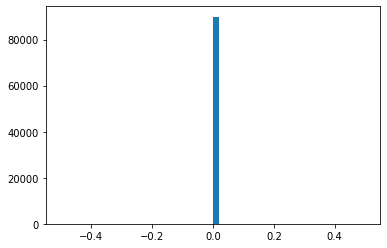

for English text :


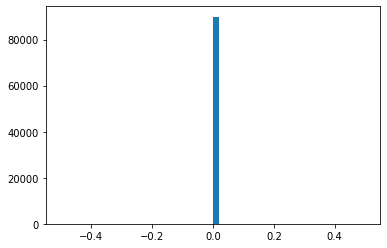

Lets check the sentence length distribution


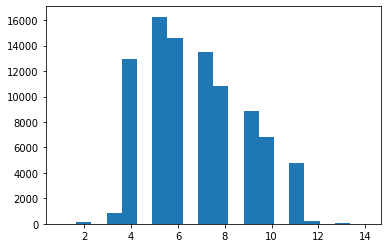

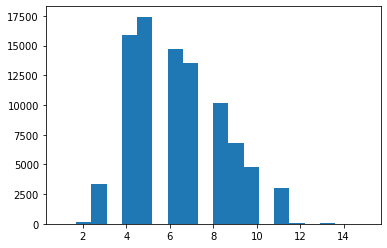

In [ ]:
# Data from set1

k1=[i for i in range(len(hin_set)) if hin_set[i].count(1)<1]
k2=[i for i in range(len(eng_set)) if eng_set[i].count(1)<1]
k=list(set(k1)&set(k2))
hin_set1=[hin_set[i] for i in k]
eng_set1=[eng_set[i] for i in k]

assert len(hin_set1)==len(eng_set1), ' Something went wrong'

print('after reduction:',len(hin_set1))


# Checking the correctness

for n in range(5):
  r=random.randint(10,1000)
  a=hin_set1[r]
  b=eng_set1[r]
  print([tokenizer_hin.index_word[i] for i in a],'\n',[tokenizer_eng.index_word[i] for i in b])

  # Distribution after trimming

print('Distribution OOV for set 4-11')
h=[i.count(1) for i in hin_set1]
e=[i.count(1) for i in eng_set1]
print('for hindi text :')
plt.hist(h ,bins=50)
plt.show()
print('for English text :')
plt.hist(e ,bins=50)
plt.show()

# Sentence length distribution
print('Lets check the sentence length distribution') 
# Checking the length of sentences
h=[len(i) for i in hin_set1 ]
e=[len(i) for i in eng_set1 ]

plt.hist(h ,bins=20)
plt.show()
plt.hist(e ,bins=20)
plt.show()



In [ ]:


trn_hin=hin_set1
trn_eng=eng_set1

#assert len(trn_hin)==len(trn_eng)==15812+22062+2000 , 'something went wrong'

# Chencking the correctness

for n in range(10):
  r=random.randint(10,39000)
  a=trn_hin[r]
  b=trn_eng[r]
  print([tokenizer_hin.index_word[i] for i in a],'\n',[tokenizer_eng.index_word[i] for i in b])

['एक', 'सर्वेक्षण', 'के', 'परिणाम'] 
 ['let', 'me', 'share', 'with', 'you', 'the', 'results', 'of', 'a', 'survey']
['सॉकेट', 'नहीं', 'बना', 'सकाः', 's'] 
 ['could', 'not', 'remove', 'delegate', 's']
['टेबल', 'में', 'पंक्तियों', 'की', 'संख्या'] 
 ['the', 'number', 'of', 'rows', 'in', 'the', 'table']
['जितना', 'आप', 'करते', 'हैं', 'उससे', 'कहीं', 'अधिक', 'आप', 'जानते', 'हैं'] 
 ['you', 'know', 'more', 'than', 'you', 'think', 'you', 'do']
['मैं', 'कुछ', 'समझ', 'नहीं', 'पा', 'रही', 'हूं।'] 
 ['i', 'am', 'not', 'able', 'to', 'understand', 'a', 'thing']
['संदेश', 'के', 'प्राप्तकर्ताओं', 'को', 'दाखिल', 'करें'] 
 ['enter', 'the', 'recipients', 'of', 'the', 'message']
['मानक', 'के', 'अनुपालन', 'के', 'लिए', 'किया', 'जाने', 'वाला', 'परीक्षण'] 
 ['the', 'act', 'of', 'testing', 'for', 'compliance', 'with', 'a', 'standard']
['उन', 'दोनो', 'बाग़ो', 'में', 'दो', 'प्रवाहित', 'स्रोत', 'है।'] 
 ['in', 'them', 'are', 'two', 'flowing', 'springs']
['औद्योगिक', 'विकास', 'तथा', 'कंपनी', 'मामले'] 
 ['industria

In [ ]:
# Add start and End token 

trn_hin=[[5000]+i+[5001] for i in trn_hin]
trn_eng=[[5000]+i+[5001] for i in trn_eng]

# Add pad and start word.

# In english vocab add <pad> and <start>,<end> token 
tokenizer_eng.word_index['<pad>'] = 0
tokenizer_eng.word_index['<start>'] = 5000
tokenizer_eng.word_index['<end>'] = 5001



# In hindi vocab add <pad> and <start>,<end> token 
tokenizer_hin.word_index['<pad>']=0
tokenizer_hin.word_index['<start>'] = 5000
tokenizer_hin.word_index['<end>'] = 5001


print('Now the size of the vocab is now, for hindi {} and eng {}'.format(len(tokenizer_hin.word_index),len(tokenizer_eng.word_index)))

# Create reverse Dictionary 

hn_itow={i:j for j,i in tokenizer_hin.word_index.items()}
en_itow={i:j for j,i in tokenizer_eng.word_index.items()}

Now the size of the vocab is now, for hindi 100147 and eng 69225


In [ ]:
# We can pad the sequence upto its max length

hn=tf.keras.preprocessing.sequence.pad_sequences(
    trn_hin, maxlen=13, dtype='int32', padding='post', truncating='post',
    value=0.0)

en=tf.keras.preprocessing.sequence.pad_sequences(
    trn_eng, maxlen=13, dtype='int32', padding='post', truncating='post',
    value=0.0)


# Lets check the vocab length

print('Length of Hindi vocab {} and english vocab {}'.format(len(tokenizer_hin.word_index),len(tokenizer_eng.word_index)))

Length of Hindi vocab 100147 and english vocab 69225


mean length for Hindi sentence =8.765739515330806, for english=8.318126716861105
STD for Hindi sentence length =2.100094177734848, for english=2.0369404146174244


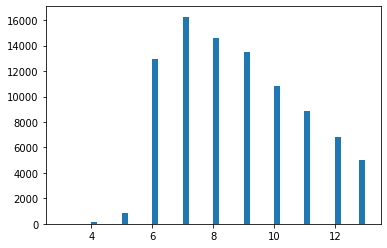

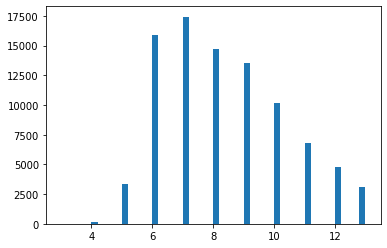



Max len for hindi =13 , for english 13

 Length of dataset= 89917


In [ ]:
# Lets again check the sentence length distribution
# Checking the length of sentences
h=[np.nonzero(i>0)[0].shape[0] for i in hn ]
e=[np.nonzero(i>0)[0].shape[0] for i in en ]
print('mean length for Hindi sentence ={}, for english={}'.format(np.mean(h),np.mean(e)))
print('STD for Hindi sentence length ={}, for english={}'.format(np.std(h),np.std(e)))


plt.hist(h ,bins=50)
plt.show()
plt.hist(e ,bins=50)
plt.show()

# max len \
print('\n\nMax len for hindi ={} , for english {}'.format(max(h),max(e)))
print('\n Length of dataset=',len(hn))

In [ ]:
hn.shape

(89917, 13)

In [ ]:
en.shape

(89917, 13)

#Attention mechanism for word alignmnt 

Implementing the paper's archetacture  

Paper- NEURAL MACHINE TRANSLATION
BY JOINTLY LEARNING TO ALIGN AND TRANSLATE
by - Dzmitry Bahdanau


  1. The Encoder -Decoder architecture is as follows-

  Encoder = Input --> Embedding with 24 vector size ---> Bi-Directional lstm with 22 units.
    
  Decoder = Output --> Bidirectional lstm 25 units--> softmax Dense
    

In [ ]:
! pip install tf-nightly --upgrade

     |████████████████████████████████| 400.1MB 40kB/s 
     |████████████████████████████████| 12.2MB 51.4MB/s 
     |████████████████████████████████| 471kB 32.5MB/s 
     |████████████████████████████████| 4.0MB 45.7MB/s 
     |████████████████████████████████| 4.0MB 48.4MB/s 
ERROR: tensorflow 2.4.0 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement grpcio~=1.32.0, but you'll have grpcio 1.34.1 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
  Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [ ]:
# Encoder

# Building encoder with bidirectional lstm
tf.keras.backend.clear_session()

class Encoder(tf.keras.Model):
  def __init__(self):
    super(Encoder,self).__init__()
    self.em=tf.keras.layers.Embedding(5002,512)
    #self.drop=tf.keras.layers.Dropout(0.2)
    #self.drop1=tf.keras.layers.Dropout(0.2)
    self.enc=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128,activation='relu',return_state=True,return_sequences=True))
    #self.enc=tf.keras.layers.LSTM(256,activation='relu',return_state=True,return_sequences=True)
    #self.enc1=tf.keras.layers.Bidirectional(tf.keras.layers.GRU(15,activation='relu',return_state=True))


  def call(self,inputs):
    emb=self.em(inputs)
    #d1=self.drop(emb)
    en1=self.enc(emb)
    #d2=self.drop1(en1[0])
    #en2=self.enc1(d2)
    #out=tf.reshape(en1[0],(en1[0].shape[0],1,30))
    hid=tf.concat([en1[1],en1[2]],axis=1)
    return en1[0],hid
    #return en1[0],en1[1]

enc=Encoder()

In [ ]:
# Testing the input
# Required output shape==> (batch,maxlen,hidden_state)  ==(2,22,44)
inp=en[:2]
#o=enc(inp)
out,hid=enc(inp)
assert out.shape==(2,13,256), 'Somthing went wrong with out'
assert hid.shape==(2,256), 'Somthing went wrong with hidden output'
print('looks fine')

looks fine


In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self,units):
    super(BahdanauAttention,self).__init__()
    #self.units=units
    self.w1=tf.keras.layers.Dense(units)
    self.w2=tf.keras.layers.Dense(units)
    self.v=tf.keras.layers.Dense(1)
    self.activation = tf.keras.layers.Activation('tanh')
    #self.activation1 = tf.keras.layers.Activation('softmax')
    #self.soft=tf.keras.activations.softmax(axis=1)

  def call (self,inputs):
    dec_hid,enc_out=inputs
    x=self.w1(dec_hid)+self.w2(enc_out)
    x=self.activation(x)
    x=self.v(x)
    wghts=tf.keras.activations.softmax(x,axis=1)
    context_vector=wghts*enc_out
    context_vector=tf.reduce_sum(context_vector,axis=1)
    return wghts,context_vector
  
#  def get_config(self):
#    return {"units": self.units}


#units=30
at=BahdanauAttention(256)

In [ ]:
#Testing bahdanau's attention word alignment

init=tf.random_normal_initializer()
dec_hid=tf.Variable(initial_value=init(shape=(2,1,256),dtype=tf.float32))
enc_out=out

# Expected weights output shape ==> (batch,maxlen,1) ==> (2,15,1)
# Expected context vector output shape ==> (batch,hidden) ==> (2,15)
inputs=[dec_hid,enc_out]
weights,context_vector=at(inputs)
assert weights.shape==(2,13,1), 'Somthing went wrong with weights'
assert context_vector.shape==(2,256), 'Somthing went wrong with context_vector'
print('looks fine')

# Printing the weights
weights

looks fine


<tf.Tensor: shape=(2, 13, 1), dtype=float32, numpy=
array([[[0.07708353],
        [0.07626661],
        [0.07601092],
        [0.07587422],
        [0.07701611],
        [0.07826216],
        [0.07804369],
        [0.07733694],
        [0.07694626],
        [0.07677229],
        [0.07671549],
        [0.07675375],
        [0.07691802]],

       [[0.07760727],
        [0.07775857],
        [0.07597933],
        [0.07663165],
        [0.07707295],
        [0.07704426],
        [0.07754842],
        [0.07707342],
        [0.07676278],
        [0.0766117 ],
        [0.07655753],
        [0.07659468],
        [0.07675742]]], dtype=float32)>

In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self):
    super(Decoder,self).__init__()
    self.em=tf.keras.layers.Embedding(5002,512)
    #self.drop=tf.keras.layers.Dropout(0.2)
    #self.drop1=tf.keras.layers.Dropout(0.2)
    self.dec=tf.keras.layers.GRU(256,activation='relu',return_state=True,return_sequences=True)
    #self.dec1=tf.keras.layers.GRU(21,activation='relu',return_state=True,return_sequences=True)
    self.dense=tf.keras.layers.Dense(5002)
    self.attention=BahdanauAttention(256)

  def call(self,inputs):
    enc_out,dec_hidden,inp=inputs
    x=self.em(inp)
    weights,context_vector=self.attention([dec_hidden,enc_out])
    context_vector=tf.expand_dims(context_vector, 1)
    #context_vector=tf.reshape(context_vector,shape=(context_vector.shape[0],1,context_vector.shape[-1]))
    concat=tf.keras.layers.concatenate([x,context_vector,dec_hidden],axis=2)
    #drop=self.drop(concat)
    dec_out,dec_hidden=self.dec(concat)
    #drop1=self.drop1(dec_out)
    #dec_hidden2=tf.reshape(dec_hidden2,shape=(dec_hidden2.shape[0],1,dec_hidden2.shape[-1]))
    #concat1=tf.keras.layers.concatenate([dec_out,dec_hidden2],axis=2)
    #drop1=self.drop1(concat1)
    #dec_out2,dec_hidden2=self.dec1(drop1)
    pred=self.dense(dec_out)
    return dec_hidden,pred,weights
  
  
dec=Decoder()

In [ ]:
#Testing decoder

# Output shapes should be : dec_hidden=(batch,1,hidden)==>(2,1,21),weights=(batch,maxlen,1)==>(2,15,1)
#                           pred=(batch,1,vocab)==>(2,1,347) 
enc_out=out
init=tf.random_normal_initializer()
dec_hid=tf.Variable(initial_value=init(shape=(2,1,256),dtype=tf.float32))
inp=np.array([5000,5000]).reshape((2,1))
input=[enc_out,dec_hid,inp]
dec_hidden,pred,weights=dec(input)

assert weights.shape==(2,13,1), 'Somthing went wrong with weights'
assert dec_hidden.shape==(2,256), 'Somthing went wrong with decoder hidden'
assert pred.shape==(2,1,5002), 'Somthing went wrong with prediction vector'

print('looks good')

looks good


In [ ]:
# Creating required APIs
ls_ = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
acc=tf.keras.metrics.Accuracy()

In [ ]:
# with autograph

class Test_step():
  def __init__(self,batch):
    self.batch=batch
    self.pred_out=[]
    self.loss=0

  @tf.function
  def  __call__(self,inp,out):
    with tf.GradientTape() as tape:
      enc_out,dec_hid=enc(inp)
      dec_hid=tf.reshape(dec_hid,shape=(self.batch,1,dec_hid.shape[-1]))
      for i in range(1,out.shape[1]):
        dec_inp=tf.reshape(out[:,i-1],shape=(self.batch,1))
        dec_hid,pred,weights=dec([enc_out,dec_hid,dec_inp])
        dec_hid=tf.reshape(dec_hid,shape=(self.batch,1,dec_hid.shape[-1]))
        self.pred_out.append(pred)

      ypred=tf.concat(self.pred_out,axis=1)

      ls=ls_(out[:,1:],ypred)

    variables = enc.trainable_variables + dec.trainable_variables
    gradients = tape.gradient(ls, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    #self.dec_hidden=dec_hid
    return ls,ypred


#step=Test_step(30)

In [ ]:
# checking if training is actually happening or not
'''
batch=30
initializer=tf.random_normal_initializer(seed=33)
dec_hid=tf.Variable(initial_value=initializer(shape=(batch,1,21),dtype=tf.float32))
'''

# Test 1
step=Test_step(30)
inp=en[:30]
out=hn[:30]

ls,ypred=step(inp,out)
print(ls)

tf.Tensor(8.516514, shape=(), dtype=float32)


In [ ]:
# Test 2
inp=en[30:60]
out=hn[30:60]

ls,ypred=step(inp,out)
print(ls)

tf.Tensor(8.506647, shape=(), dtype=float32)


In [ ]:
# Test 3
inp=en[60:90]
out=hn[60:90]

ls,ypred=step(inp,out)
print(ls)

tf.Tensor(8.495469, shape=(), dtype=float32)


In [ ]:
# Lets train the model for 20 epochs
import time 
# Training...
batch=64
#step=Test_step(batch)
trn=tf.data.Dataset.from_tensor_slices((en,hn)).batch(batch,drop_remainder=True).shuffle(80000, reshuffle_each_iteration=True)
epochs=4
print('Training starts ...')
for j in range(epochs):
  t=time.time()
  print('\n\n---Epoch {}  :----'.format(j+1))
  for i,(inp,out) in enumerate(trn):
    ls,ypred=step(inp,out)
    ypred=tf.math.argmax(ypred,axis=2)
    ypred=tf.reshape(ypred,shape=out[:,1:].shape)
    ac=acc(ypred,out[:,1:])
    if (i+1)%200==0:
      print('At {}th batch    loss={} , accuracy={}'.format(i+1,ls,ac))

  t=time.time()-t
  print('\nTime required for {}th epoch : {}'.format(j+1,t))

Training starts ...


---Epoch 1  :----
At 200th batch    loss=0.25737515091896057 , accuracy=0.8490152955055237
At 400th batch    loss=0.33152344822883606 , accuracy=0.8496444821357727
At 600th batch    loss=0.16367371380329132 , accuracy=0.8502346277236938
At 800th batch    loss=0.2507917582988739 , accuracy=0.8507636785507202
At 1000th batch    loss=0.3414500653743744 , accuracy=0.8512564301490784
At 1200th batch    loss=0.23873622715473175 , accuracy=0.8517256379127502
At 1400th batch    loss=0.35926517844200134 , accuracy=0.8521904349327087

Time required for 1th epoch : 735.893993139267


---Epoch 2  :----
At 200th batch    loss=0.17991571128368378 , accuracy=0.8528128266334534
At 400th batch    loss=0.1679488867521286 , accuracy=0.8534064888954163
At 600th batch    loss=0.21884238719940186 , accuracy=0.8539605736732483
At 800th batch    loss=0.24053657054901123 , accuracy=0.8544783592224121
At 1000th batch    loss=0.23464824259281158 , accuracy=0.8549587726593018
At 1200th batch

In [ ]:
class Prediction():
  def __init__(self,batch):
    self.batch=batch
    #initializer=tf.random_normal_initializer(seed=33)
    #self.dec_hidden=tf.Variable(initial_value=initializer(shape=(batch,1,21),dtype=tf.float32))
    self.dec_input=np.array([5000]*batch).reshape(batch,1)
    self.pred_out=[]
    self.wghts=[]

  def __call__(self,inp):
    dec_inp=self.dec_input
    #dec_hid=self.dec_hidden
    enc_out,dec_hid=enc(inp)
    dec_hid=tf.reshape(dec_hid,shape=(self.batch,1,dec_hid.shape[-1]))
    for i in range(13):
      #dec_inp=tf.reshape(inp[i],shape=(1,1))
      dec_hid,pred,weights=dec([enc_out,dec_hid,dec_inp])
      dec_inp=tf.reshape(tf.math.argmax(pred,axis=2),shape=(self.batch,1))
      dec_hid=tf.reshape(dec_hid,shape=(self.batch,1,dec_hid.shape[-1]))
      self.pred_out.append(pred)
      self.wghts.append(weights)
    weight=tf.concat(self.wghts,axis=2)
    ypred=tf.concat(self.pred_out,axis=1)
    return ypred,weight

In [ ]:
import random
for k in range(10):
  p=random.randint(10,2500)
  inp=en[p].reshape((1,13))
  out=hn[p]

  p=Prediction(1)

  ypred,weight=p(inp)

  ypr=tf.math.argmax(ypred,axis=2)
  print([en_itow[i] for i in inp.reshape((13))])
  print([hn_itow[i] for i in out[1:]])
  print([hn_itow[i] for i in ypr.numpy().reshape((13))])

['<start>', 'the', 'most', 'recently', 'selected', 'folder', 'in', 'the', 'folder', 'selection', 'dialog', '<end>', '<pad>']
['फ़ोल्डर', 'चयन', 'संवाद', 'में', 'सबसे', 'हालिया', 'चयनित', 'फ़ोल्डर', '<end>', '<pad>', '<pad>', '<pad>']
['फ़ोल्डर', 'चयन', 'संवाद', 'में', 'सबसे', 'हालिया', 'चयनित', 'फ़ोल्डर', '<end>', '<pad>', '<pad>', '<pad>', '<pad>']
['<start>', 'sorry', 'could', 'not', 'save', 'this', 'file', '<end>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['क्षमा', 'करें', 'इस', 'फ़ाइल', 'को', 'सुरक्षित', 'नहीं', 'किया', 'जा', 'सका।', '<end>', '<pad>']
['क्षमा', 'करें', 'इस', 'फ़ाइल', 'को', 'सुरक्षित', 'नहीं', 'किया', 'जा', 'सका।', '<end>', '<pad>', '<pad>']
['<start>', 'missing', 'location', 'of', 'plugin', 's', '<end>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['अनुपस्थित', 'स्थान', 'का', 'प्लगइन', 'से', '<end>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['अनुपस्थित', 'स्थान', 'का', 'प्लगइन', 'से', '<end>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', 

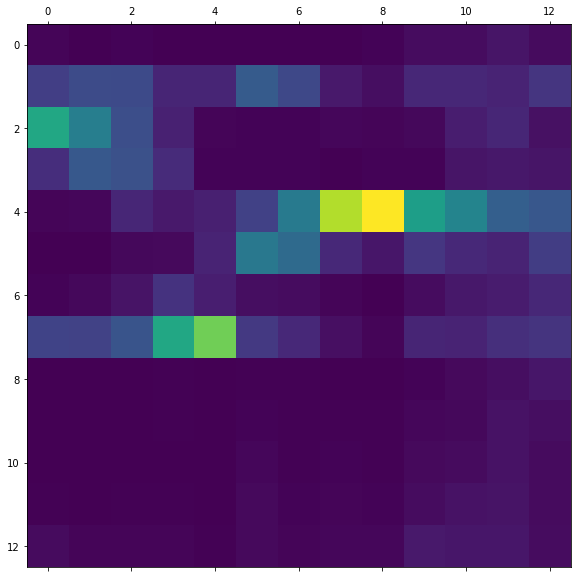

In [ ]:
inp=en[21].reshape((1,13))
out=hn[21]

p=Prediction(1)

ypred,weight=p(inp)
weight=tf.reshape(weight,shape=(13,13))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.matshow(weight, cmap='viridis')
plt.show()

In [ ]:
enc_out,dec_hid=enc(inp)
      dec_hid=tf.reshape(dec_hid,shape=(self.batch,1,dec_hid.shape[-1]))
      dec_inp=tf.reshape(out[:,i-1],shape=(self.batch,1))
      for i in range(1,out.shape[1]):
        dec_inp=tf.reshape(out[:,i-1],shape=(self.batch,1))
        dec_hid,pred,weights=dec(enc_out,dec_hid,dec_inp)
        dec_hid=tf.reshape(dec_hid,shape=(self.batch,1,dec_hid.shape[-1]))
        dec_inp=tf.reshape(tf.math.argmax(pred,axis=2),shape=(self.batch,1))
        self.pred_out.append(pred)

      ypred=tf.concat(self.pred_out,axis=1)

In [ ]:
def translate(sen):
  sen=sen.split()
  s=[]
  for i in sen:
    if i in tokenizer_eng.word_index.keys():
      if tokenizer_eng.word_index[i] <5000:
        s.append(tokenizer_eng.word_index[i])
      else:
        s.append(1)
  s=s[:19]
  s=[5000]+s+[5001]
  inp=tf.keras.preprocessing.sequence.pad_sequences([s], maxlen=13,padding='post',truncating='post')
  inp=inp.reshape((1,13))
  enc_out,dec_hid=enc(inp)
  
  result=''
  dec_inp=inp[:,0].reshape((1,1))
  for i in range(1,13):
    dec_hid=tf.reshape(dec_hid,shape=(1,1,dec_hid.shape[-1]))
    dec_hid,pred,weights=dec(enc_out,dec_hid,dec_inp)
    dec_inp=tf.reshape(tf.math.argmax(pred,axis=2),shape=(1,1))
    r=tf.reshape(dec_inp,shape=(1))
    r=hn_itow[r.numpy()[0]]
    #print(r)
    if r=='<end>':
      return result
    result=result + ' ' + r
  return result


In [ ]:
ans=translate(input('Enter sentence to translate'))
print('\n\nTranslated sentence:\n',ans)

Enter sentence to translateI would love to accept your love


Translated sentence:
  आपके लिये समझने के लिए आपको प्यार करना चाहते हैं


# Saving the model

In [ ]:
class Model(tf.keras.Model):
  def __init__(self,enc,dec):
    super(Model,self).__init__()
    self.enc=enc
    self.dec=dec

  @tf.function
  def  call (self,inp):
    result=[]
    enc_out,dec_hid=self.enc(inp)
    dec_inp=tf.reshape(inp[:,0],shape=[1,1])
    for i in range(1,13):
      dec_hid=tf.reshape(dec_hid,shape=(1,1,dec_hid.shape[-1]))
      dec_hid,pred,weights=self.dec([enc_out,dec_hid,dec_inp])
      dec_inp=tf.reshape(tf.math.argmax(pred,axis=2),shape=(1,1))
      result.append(dec_inp)
    o=tf.concat(result,axis=1)
    o=tf.squeeze(o,axis=[0])
    return o

In [ ]:
model=Model(enc,dec)

In [ ]:
# Checking the model output.
inp=en[2155].reshape((1,13))
out=model(inp)

In [ ]:
out

<tf.Tensor: shape=(12,), dtype=int64, numpy=
array([  93,   38,   11,  337, 5001,    0,    0,    0,    0,    0,    0,
          0])>

In [ ]:
p=Prediction(1)
ypred,weight=p(inp)
ypr=tf.math.argmax(ypred,axis=2)
ypr

<tf.Tensor: shape=(1, 13), dtype=int64, numpy=
array([[  93,   38,   11,  337, 5001,    0,    0,    0,    0,    0,    0,
           0,    0]])>

In [ ]:
path='/content/drive/MyDrive/models/en-hin app/1'

In [ ]:
tf.saved_model.save(
    model, path,
    signatures=model.call.get_concrete_function(
        tf.TensorSpec(shape=[1,13], dtype=tf.int32, name="inp")))


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/en-hin app/1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/en-hin app/1/assets


In [ ]:
converter=tf.lite.TFLiteConverter.from_saved_model(path)

In [ ]:
imported = tf.saved_model.load(path)
print(imported.signatures)

_SignatureMap({'serving_default': <ConcreteFunction signature_wrapper(*, inp) at 0x7F1E157DEF28>})


In [ ]:
tflite_model = converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
with open('/content/drive/MyDrive/models/en-hin app/model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.int32)
interpreter.set_tensor(input_details[0]['index'], input_data)

In [ ]:
interpreter.invoke()

In [ ]:
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

In [ ]:
hn_wtoi=tokenizer_hin.word_index
en_wtoi=tokenizer_eng.word_index

In [ ]:
import json

with open('/content/drive/MyDrive/models/en-hin app/hn_wtoi.json', 'w') as fp:
    json.dump(hn_wtoi, fp,indent=2)

In [ ]:
with open('/content/drive/MyDrive/models/en-hin app/en_wtoi.json', 'w') as fp:
    json.dump(en_wtoi, fp,indent=2)

In [ ]:
with open('/content/drive/MyDrive/models/en-hin app/hn_itow.json', 'w') as fp:
    json.dump(hn_itow, fp,indent=2)

In [ ]:
with open('/content/drive/MyDrive/models/en-hin app/en_itow.json', 'w') as fp:
    json.dump(en_itow, fp,indent=2)

In [ ]:
with open('/content/drive/MyDrive/models/en-hin app/en_itow.json', 'w') as fp:
    json.dump(en_itow, fp,indent=2)